# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve



In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

Number of healthy individuals in each group:
 1.0    92
0.0    72
Name: sex, dtype: int64

Number of patients in each group:
 1.0    46
0.0     9
Name: sex, dtype: int64

Total in each group:
 1.0    206
0.0     97
Name: sex, dtype: int64

Average number of patients in each group:
 1.0    0.223301
0.0    0.092784
Name: sex, dtype: float64

Odds in each group:
 1.0    0.500
0.0    0.125
Name: sex, dtype: float64

Odds ratio (with total as the reference) in each group:
 1.0    0.356250
0.0    0.035511
Name: sex, dtype: float64

Logit (LOG(Odds)) in each group:
 1.0   -0.693147
0.0   -2.079442
Name: sex, dtype: float64

Weight of Evidence (WOE) (with total as the reference) in each group:
 1.0   -1.032123
0.0   -3.337903
Name: sex, dtype: float64

Mean value of the explanatory variable in each group:
 sex
0.0    0.0
1.0    1.0
Name: sex, dtype: float64


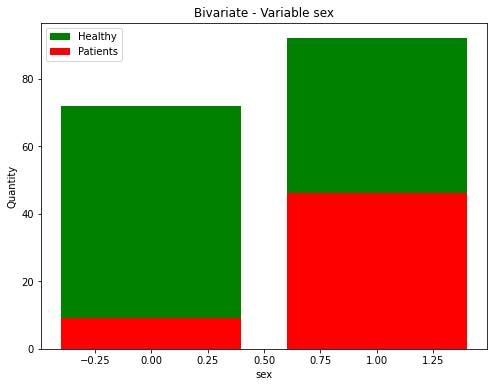


Bivariate Analysis:
     Number of healthy individuals  Number of patients  Total  \
0.0                             72                   9     97   
1.0                             92                  46    206   

     Average number of patients   Odds  \
0.0                    0.092784  0.125   
1.0                    0.223301  0.500   

     Odds ratio (with total as the reference)  Logit (LOG(Odds))  \
0.0                                  0.035511          -2.079442   
1.0                                  0.356250          -0.693147   

     Weight of Evidence (WOE) (with total as the reference)  \
0.0                                          -3.337903        
1.0                                          -1.032123        

     Mean value of the explanatory variable  
0.0                                     0.0  
1.0                                     1.0  


In [19]:
def bivariate_analysis(data, response_var, explanatory_var):

    num_healthy = data[data[response_var] == 0][explanatory_var].value_counts()


    num_patients = data[data[response_var] == 1][explanatory_var].value_counts()


    total = data[explanatory_var].value_counts()


    avg_patients = num_patients / total


    odds = num_patients / num_healthy


    odds_ratio = odds / ((total - num_patients) / (total - num_healthy))


    logit = np.log(odds)


    woe = np.log(odds_ratio)


    mean_value = data.groupby(explanatory_var)[explanatory_var].mean()


    print("Number of healthy individuals in each group:\n", num_healthy)
    print("\nNumber of patients in each group:\n", num_patients)
    print("\nTotal in each group:\n", total)
    print("\nAverage number of patients in each group:\n", avg_patients)
    print("\nOdds in each group:\n", odds)
    print("\nOdds ratio (with total as the reference) in each group:\n", odds_ratio)
    print("\nLogit (LOG(Odds)) in each group:\n", logit)
    print("\nWeight of Evidence (WOE) (with total as the reference) in each group:\n", woe)
    print("\nMean value of the explanatory variable in each group:\n", mean_value)

    plt.figure(figsize=(8, 6))
    plt.title(f"Bivariate - Variable {explanatory_var}")
    plt.xlabel(explanatory_var)
    plt.ylabel("Quantity")


    plt.bar(num_healthy.index, num_healthy, label="Healthy", color='green')


    plt.bar(num_patients.index, num_patients, label="Patients", color='red')


    plt.legend()


    plt.show()


    bivariate_df = pd.DataFrame({
        'Number of healthy individuals': num_healthy,
        'Number of patients': num_patients,
        'Total': total,
        'Average number of patients': avg_patients,
        'Odds': odds,
        'Odds ratio (with total as the reference)': odds_ratio,
        'Logit (LOG(Odds))': logit,
        'Weight of Evidence (WOE) (with total as the reference)': woe,
        'Mean value of the explanatory variable': mean_value
    })

    return bivariate_df



bivariate_result = bivariate_analysis(df, 'num', 'sex')
print("\nBivariate Analysis:")
print(bivariate_result)


2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [20]:
def bivariate_analysis_categorical(data, response_var, explanatory_var, num_categories=5):

    data['{}_group'.format(explanatory_var)] = pd.cut(data[explanatory_var], bins=num_categories)


    num_healthy = data[data[response_var] == 0]['{}_group'.format(explanatory_var)].value_counts()


    num_patients = data[data[response_var] == 1]['{}_group'.format(explanatory_var)].value_counts()


    total = data['{}_group'.format(explanatory_var)].value_counts()


    avg_patients = num_patients / total

    odds = num_patients / num_healthy


    odds_ratio = odds / ((total - num_patients) / (total - num_healthy))

  
    logit = np.log(odds)


    woe = np.log(odds_ratio)


    mean_value = data.groupby('{}_group'.format(explanatory_var))[explanatory_var].mean()


    print("Number of healthy individuals in each group:\n", num_healthy)
    print("\nNumber of patients in each group:\n", num_patients)
    print("\nTotal in each group:\n", total)
    print("\nAverage number of patients in each group:\n", avg_patients)
    print("\nOdds in each group:\n", odds)
    print("\nOdds ratio (with total as the reference) in each group:\n", odds_ratio)
    print("\nLogit (LOG(Odds)) in each group:\n", logit)
    print("\nWeight of Evidence (WOE) (with total as the reference) in each group:\n", woe)
    print("\nMean value of the explanatory variable in each group:\n", mean_value)


    bivariate_df = pd.DataFrame({
        'Number of healthy individuals': num_healthy,
        'Number of patients': num_patients,
        'Total': total,
        'Average number of patients': avg_patients,
        'Odds': odds,
        'Odds ratio (with total as the reference)': odds_ratio,
        'Logit (LOG(Odds))': logit,
        'Weight of Evidence (WOE) (with total as the reference)': woe,
        'Mean value of the explanatory variable': mean_value
    })

    return bivariate_df



bivariate_result = bivariate_analysis_categorical(df, 'num', 'age', num_categories=5)
print("\nBivariate Analysis:")
print(bivariate_result)


Number of healthy individuals in each group:
 (48.2, 57.8]      56
(38.6, 48.2]      50
(57.8, 67.4]      40
(67.4, 77.0]      10
(28.952, 38.6]     8
Name: age_group, dtype: int64

Number of patients in each group:
 (57.8, 67.4]      25
(48.2, 57.8]      17
(38.6, 48.2]      10
(28.952, 38.6]     2
(67.4, 77.0]       1
Name: age_group, dtype: int64

Total in each group:
 (57.8, 67.4]      107
(48.2, 57.8]       97
(38.6, 48.2]       71
(67.4, 77.0]       17
(28.952, 38.6]     11
Name: age_group, dtype: int64

Average number of patients in each group:
 (28.952, 38.6]    0.181818
(38.6, 48.2]      0.140845
(48.2, 57.8]      0.175258
(57.8, 67.4]      0.233645
(67.4, 77.0]      0.058824
Name: age_group, dtype: float64

Odds in each group:
 (28.952, 38.6]    0.250000
(38.6, 48.2]      0.200000
(48.2, 57.8]      0.303571
(57.8, 67.4]      0.625000
(67.4, 77.0]      0.100000
Name: age_group, dtype: float64

Odds ratio (with total as the reference) in each group:
 (28.952, 38.6]    0.083333


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [21]:
selected_vars = ['sex', 'cp', 'trestbps', 'age', 'num']


df_selected = df[selected_vars].copy()


categorical_vars = ['sex', 'cp']
label_encoder = LabelEncoder()
for var in categorical_vars:
    df_selected[var] = label_encoder.fit_transform(df_selected[var])


X = df_selected.drop('num', axis=1)
y = df_selected['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


logreg = LogisticRegression()
logreg.fit(X_train, y_train)


train_accuracy = logreg.score(X_train, y_train)
test_accuracy = logreg.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.5578512396694215
Testing Accuracy: 0.47540983606557374


C:\Users\TM454YK\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

C:\Users\TM454YK\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


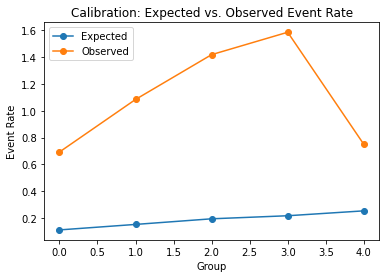

       Average Predicted Probability  Observed Event Rate
Group                                                    
0                           0.113217             0.692308
1                           0.154057             1.083333
2                           0.195860             1.416667
3                           0.218610             1.583333
4                           0.254986             0.750000


In [25]:
def evaluate_calibration(df, response_var, explanatory_vars, num_categories=5):
    
    selected_vars = explanatory_vars + [response_var]
    df_selected = df[selected_vars].copy()

    
    categorical_vars = [var for var in selected_vars if df_selected[var].dtype == 'O']
    if categorical_vars:
        label_encoder = LabelEncoder()
        for var in categorical_vars:
            df_selected[var] = label_encoder.fit_transform(df_selected[var])

   
    X = df_selected[explanatory_vars]
    y = df_selected[response_var]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = LogisticRegression()
    model.fit(X_train, y_train)

    
    predicted_probs = model.predict_proba(X_test)[:, 1]

    
    df_pred = pd.DataFrame({'Predicted_Prob': predicted_probs, response_var: y_test}).reset_index(drop=True)

   
    df_pred['Group'] = pd.qcut(df_pred['Predicted_Prob'], q=num_categories, labels=False)

   
    avg_pred_prob = df_pred.groupby('Group')['Predicted_Prob'].mean()
    event_rate = df_pred.groupby('Group')[response_var].mean()

    
    plt.plot(avg_pred_prob.index, avg_pred_prob, marker='o', label='Expected')
    plt.plot(event_rate.index, event_rate, marker='o', label='Observed')
    plt.xlabel('Group')
    plt.ylabel('Event Rate')
    plt.title('Calibration: Expected vs. Observed Event Rate')
    plt.legend()
    plt.show()

    
    calibration_results = pd.DataFrame({'Average Predicted Probability': avg_pred_prob, 'Observed Event Rate': event_rate})

    return calibration_results



explanatory_vars = ['sex', 'cp', 'trestbps', 'age']
response_var = 'num'

calibration_results = evaluate_calibration(df, response_var, explanatory_vars, num_categories=5)
print(calibration_results)


5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [27]:
binary_df = df.copy()
binary_df['num'] = (binary_df['num'] > 0).astype(int)


selected_vars = ['sex', 'cp', 'trestbps', 'age', 'num']


df_selected = binary_df[selected_vars].copy()


categorical_vars = ['sex', 'cp']
label_encoder = LabelEncoder()
for var in categorical_vars:
    df_selected[var] = label_encoder.fit_transform(df_selected[var])


X = df_selected.drop('num', axis=1)
y = df_selected['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


logreg = LogisticRegression()
logreg.fit(X_train, y_train)


train_pred_probs = logreg.predict_proba(X_train)[:, 1]
test_pred_probs = logreg.predict_proba(X_test)[:, 1]
train_predictions = logreg.predict(X_train)
test_predictions = logreg.predict(X_test)


train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)


train_auc = roc_auc_score(y_train, train_pred_probs)
test_auc = roc_auc_score(y_test, test_pred_probs)
train_gini = 2 * train_auc - 1
test_gini = 2 * test_auc - 1


train_fpr, train_tpr, _ = roc_curve(y_train, train_pred_probs)
test_fpr, test_tpr, _ = roc_curve(y_test, test_pred_probs)
train_ks = max(train_tpr - train_fpr)
test_ks = max(test_tpr - test_fpr)


print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Training Gini Index:", train_gini)
print("Testing Gini Index:", test_gini)
print("Training KS Statistic:", train_ks)
print("Testing KS Statistic:", test_ks)





Training Accuracy: 0.7727272727272727
Testing Accuracy: 0.7704918032786885
Training Gini Index: 0.6595361716857047
Testing Gini Index: 0.625
Training KS Statistic: 0.5647628937348563
Testing KS Statistic: 0.5431034482758621


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [28]:

binary_df = df.copy()
binary_df['num'] = (binary_df['num'] > 0).astype(int)


selected_vars = ['sex', 'trestbps', 'age', 'num']


df_selected = binary_df[selected_vars].copy()


categorical_vars = ['sex']
label_encoder = LabelEncoder()
for var in categorical_vars:
    df_selected[var] = label_encoder.fit_transform(df_selected[var])


X = df_selected.drop('num', axis=1)
y = df_selected['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


logreg = LogisticRegression()
logreg.fit(X_train, y_train)


train_pred_probs = logreg.predict_proba(X_train)[:, 1]
test_pred_probs = logreg.predict_proba(X_test)[:, 1]
train_predictions = logreg.predict(X_train)
test_predictions = logreg.predict(X_test)


train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)


train_auc = roc_auc_score(y_train, train_pred_probs)
test_auc = roc_auc_score(y_test, test_pred_probs)
train_gini = 2 * train_auc - 1
test_gini = 2 * test_auc - 1


train_fpr, train_tpr, _ = roc_curve(y_train, train_pred_probs)
test_fpr, test_tpr, _ = roc_curve(y_test, test_pred_probs)
train_ks = max(train_tpr - train_fpr)
test_ks = max(test_tpr - test_fpr)


print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Training Gini Index:", train_gini)
print("Testing Gini Index:", test_gini)
print("Training KS Statistic:", train_ks)
print("Testing KS Statistic:", test_ks)


Training Accuracy: 0.6735537190082644
Testing Accuracy: 0.5737704918032787
Training Gini Index: 0.4629975770162684
Testing Gini Index: 0.32974137931034475
Training KS Statistic: 0.3633783316026306
Testing KS Statistic: 0.35775862068965514
